# Nested sampling for bayesian analysis of phases distributions

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from emcee import autocorr

## Import phases from file on disk

We have gathered final files in the folder `../data-files`.

The file is in CSV format and has rows with N different columns, one for each measured phase.
The number of rows is the number of lattice configurations used for the measurements, including the thermalization phase which needs to be discarded.

In [6]:
N = 64
NT = 16
M = 64
T = 0.29
P = 0.2
data_folder = f"../data-files/N{N}/S{NT}/M{M}/T{str(T).replace('.','')}/P{str(P).replace('.','')}"

In [7]:
os.listdir(data_folder)

['summary.csv', 'phase.csv']

### Summary file

In [8]:
summary_name = f"summary.csv"

In [11]:
summary = pd.read_csv(os.path.join(data_folder,summary_name), header=0, index_col=0)

In [12]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5039
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sweep        5040 non-null   float64
 1   permcount    5040 non-null   float64
 2   dH           5040 non-null   float64
 3   pdeconfined  5040 non-null   float64
 4   pconfined    5040 non-null   float64
 5   action       5040 non-null   float64
 6   wilson       5040 non-null   float64
 7   acceptance   5040 non-null   float64
 8   nmat         5040 non-null   int64  
 9   ndec         5040 non-null   int64  
 10  ntime        5040 non-null   int64  
 11  ntau         5040 non-null   int64  
 12  udtau        5040 non-null   float64
 13  adtau        5040 non-null   float64
 14  temperature  5040 non-null   float64
 15  pdec         5040 non-null   float64
 16  pdec_var     5040 non-null   float64
 17  pcon         5040 non-null   float64
 18  pcoeff       5040 non-null   float64
 19  utau  

We can look at some of the autocorrelation times

In [13]:
tau = autocorr.integrated_time(summary.action, tol=0)
print(f"Action autocorrelation integrated time: {tau[0]:.2f}")
tau = autocorr.integrated_time(summary.wilson, tol=0)
print(f"|Wilson| autocorrelation integrated time: {tau[0]:.2f}")

Action autocorrelation integrated time: 0.96
|Wilson| autocorrelation integrated time: 1.11


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

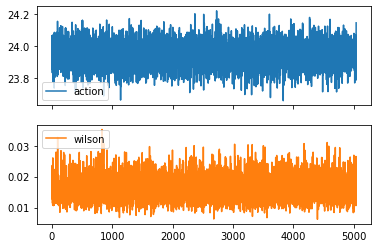

In [14]:
summary[["action","wilson"]].plot(subplots=True)

We can look at the beginning of the trajectory to see if there is some thermalization 

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

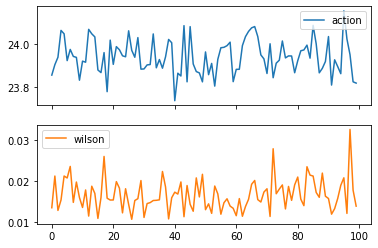

In [15]:
summary.iloc[:100][["action","wilson"]].plot(subplots=True)

### Phase file

In [16]:
phase_name = f"phase.csv"

In [19]:

phases = pd.read_csv(os.path.join(data_folder,phase_name), header=0, index_col=0)


In [20]:
phases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5039
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   theta0   5040 non-null   float64
 1   theta1   5040 non-null   float64
 2   theta2   5040 non-null   float64
 3   theta3   5040 non-null   float64
 4   theta4   5040 non-null   float64
 5   theta5   5040 non-null   float64
 6   theta6   5040 non-null   float64
 7   theta7   5040 non-null   float64
 8   theta8   5040 non-null   float64
 9   theta9   5040 non-null   float64
 10  theta10  5040 non-null   float64
 11  theta11  5040 non-null   float64
 12  theta12  5040 non-null   float64
 13  theta13  5040 non-null   float64
 14  theta14  5040 non-null   float64
 15  theta15  5040 non-null   float64
 16  theta16  5040 non-null   float64
 17  theta17  5040 non-null   float64
 18  theta18  5040 non-null   float64
 19  theta19  5040 non-null   float64
 20  theta20  5040 non-null   float64
 21  theta21  5040 

In [21]:
phases.sample(2)

,theta0,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,...,theta54,theta55,theta56,theta57,theta58,theta59,theta60,theta61,theta62,theta63
403,0.496441,3.033343,0.558466,0.023209,-1.445004,-0.718138,-0.587502,-0.300034,-1.622331,2.619157,...,1.881377,-0.958193,1.250154,2.818599,0.699271,0.103778,0.400429,0.806386,-0.189712,-0.382411
4610,-1.127657,0.746863,-1.050436,-1.564075,1.960842,-3.019252,-2.682377,-2.245929,1.779820,0.531317,...,0.171019,2.888177,-0.330632,0.670139,-0.919604,-1.520555,-1.153687,-0.840520,-1.973616,-2.336791


<AxesSubplot:>

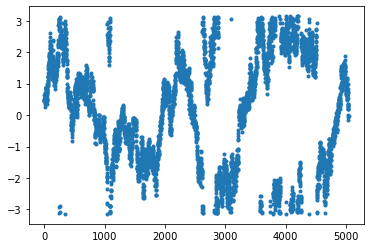

In [22]:
phases['theta0'].plot(linestyle='',marker='.')

<AxesSubplot:>

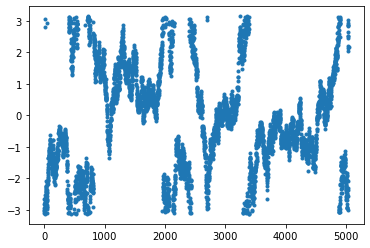

In [23]:
phases['theta15'].plot(linestyle='',marker='.')

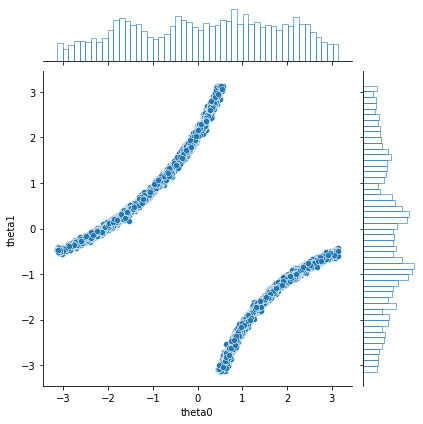

In [24]:
sns.jointplot(x='theta0', y='theta1', data=phases, marginal_kws=dict(bins=50, fill=False))

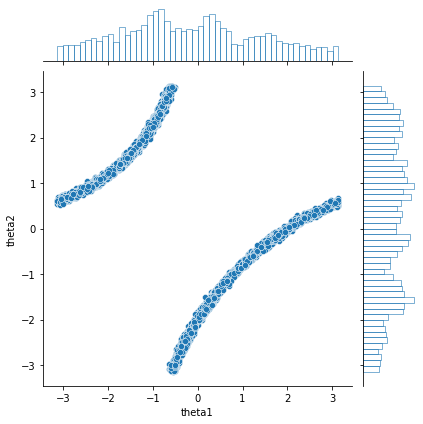

In [25]:
sns.jointplot(x='theta1', y='theta2', data=phases, marginal_kws=dict(bins=50, fill=False))

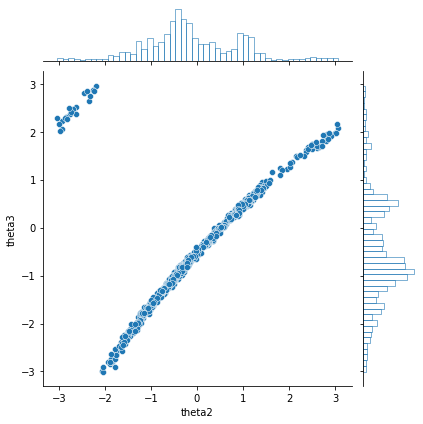

In [109]:
sns.jointplot(x='theta2', y='theta3', data=phases, marginal_kws=dict(bins=50, fill=False))

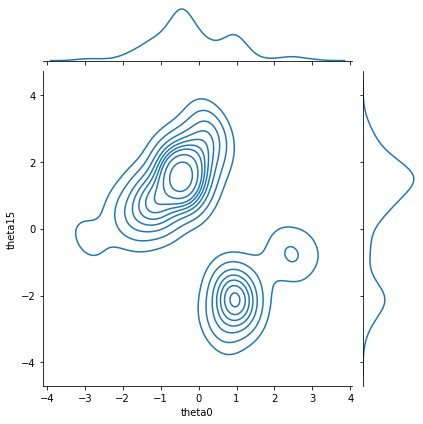

In [110]:
sns.jointplot(x='theta0', y='theta15', data=phases, kind='kde')

As long as N is not too large, we can make a pair plot (look at the interactions of all phases with each other). It is a bit expensive

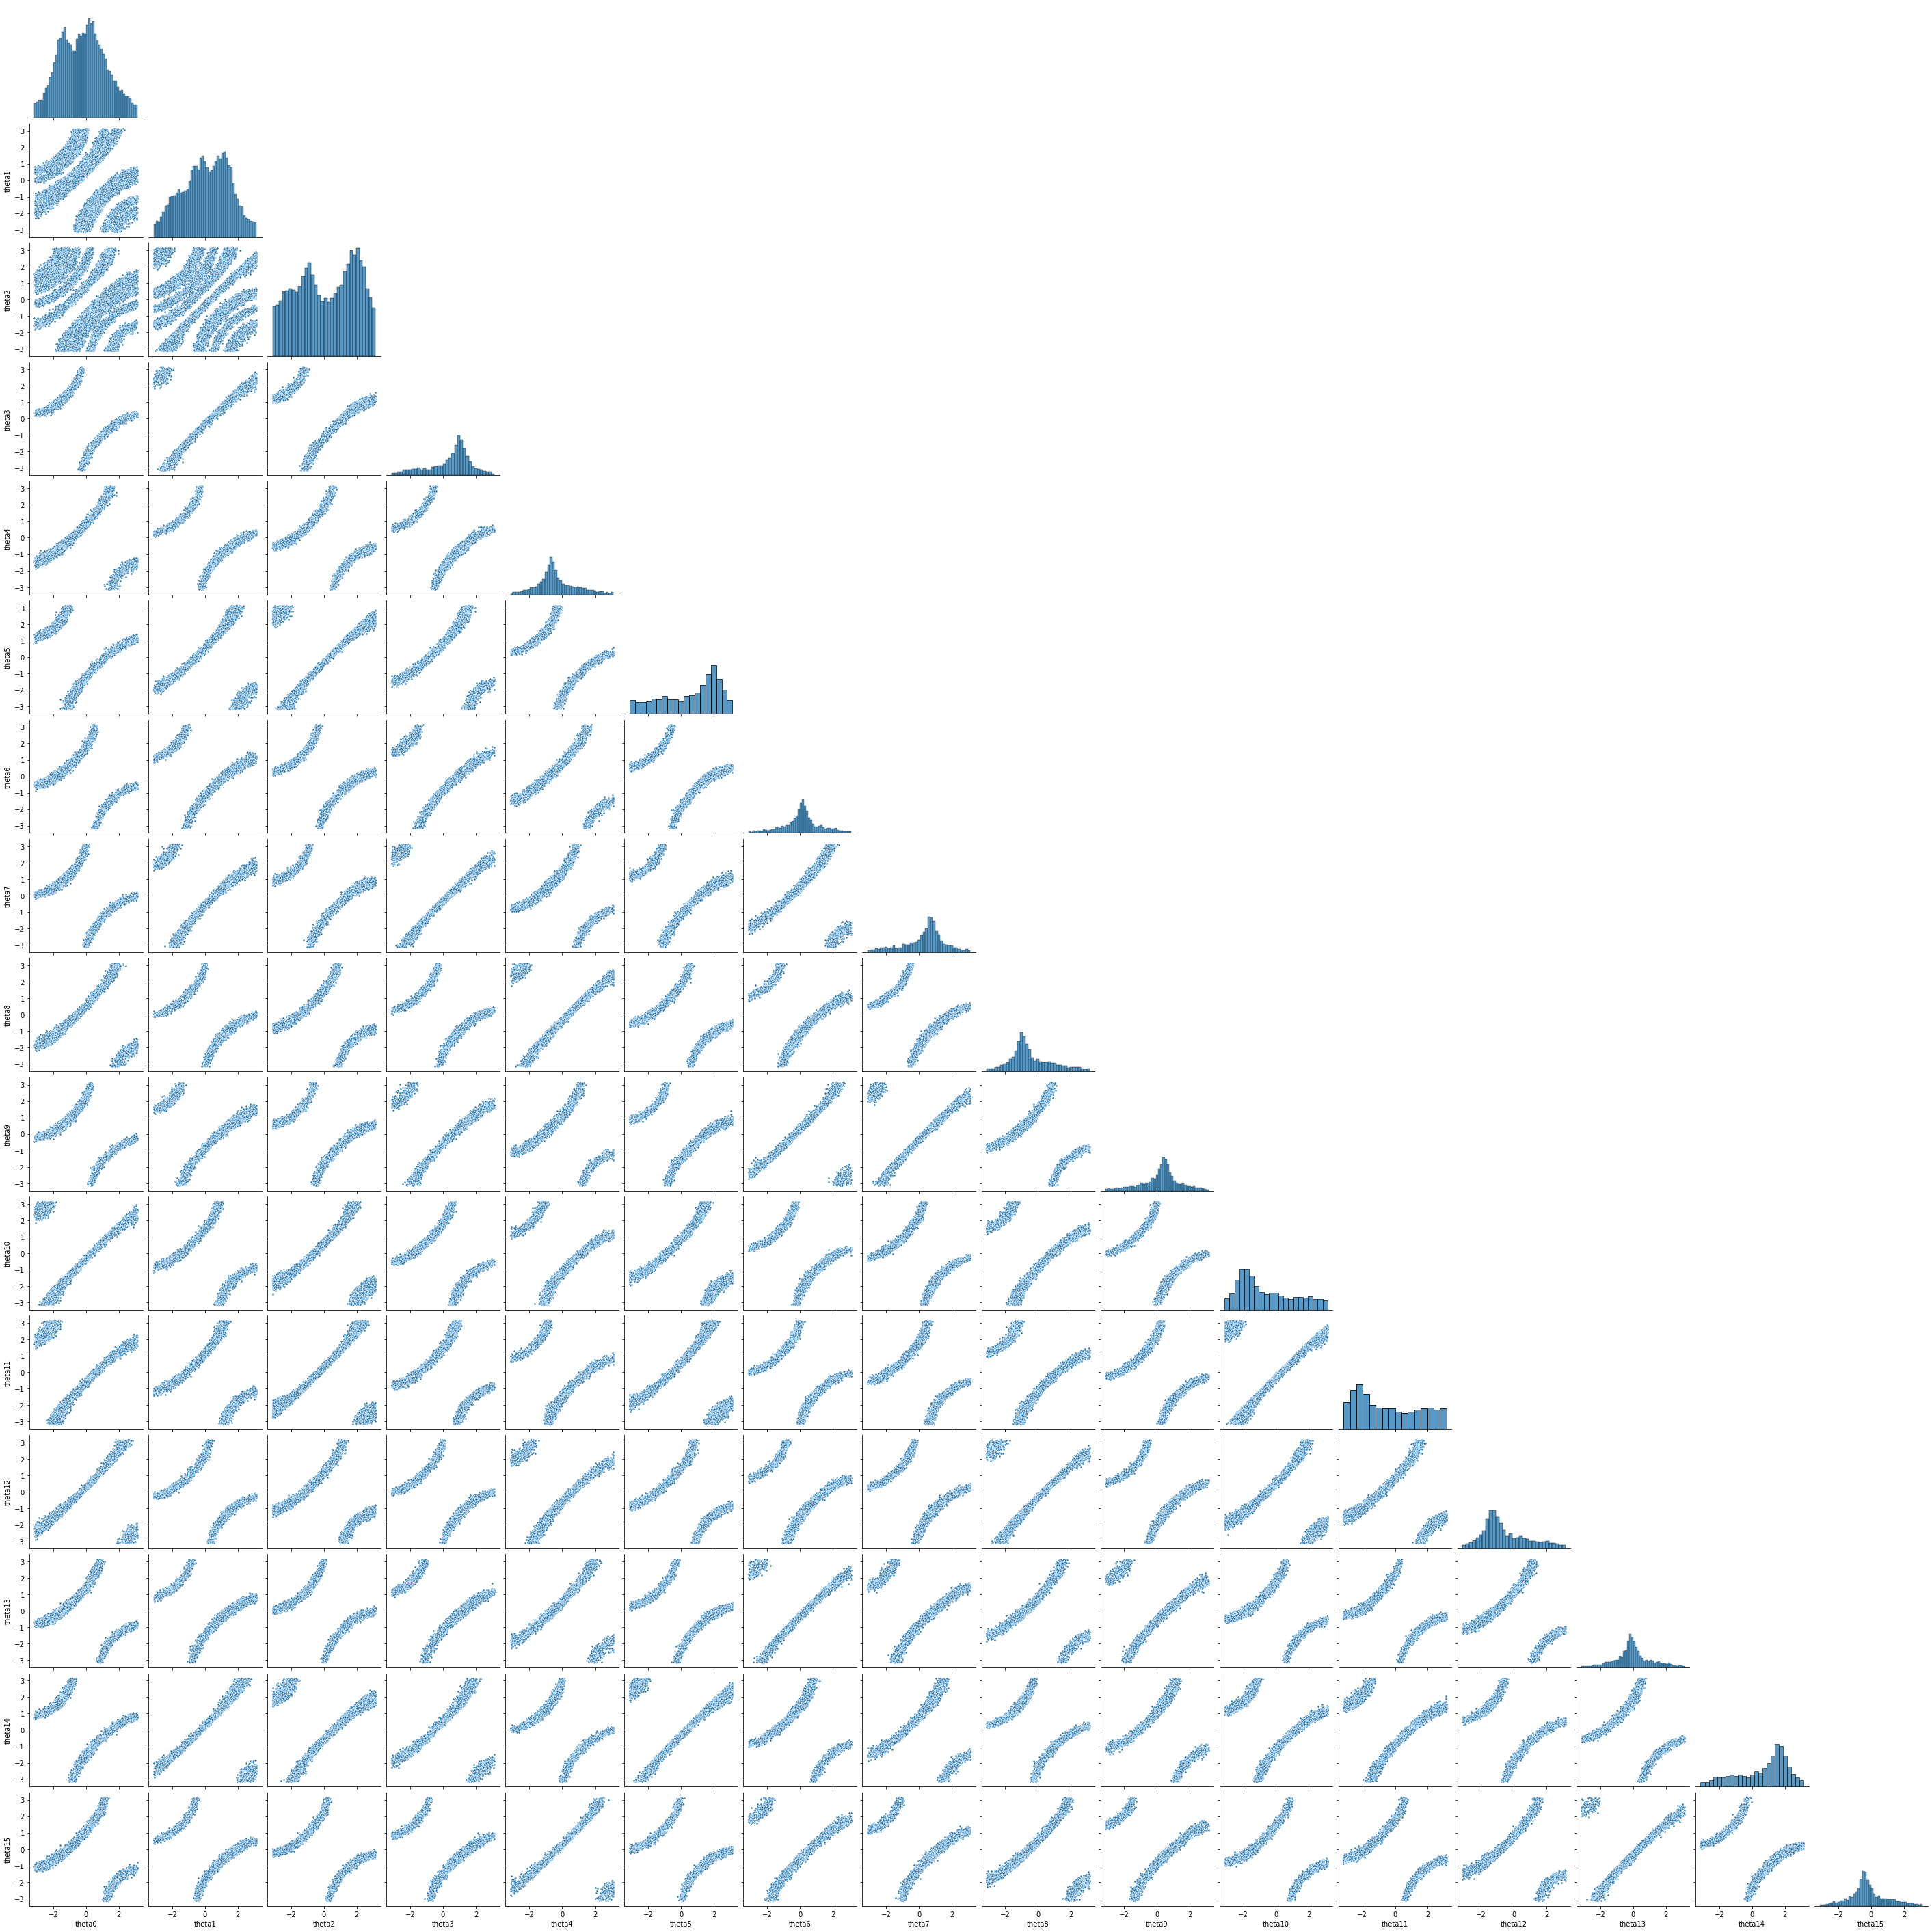

In [40]:
sns.pairplot(data=phases, corner=True, kind='scatter', diag_kind='hist', markers='.')

Create an histogram for entire dataset of phases. Here we can also choose to apply cuts for thermalization or select measurements with a certain frequency

In [26]:
freq = 2
thermcut = 100

In [27]:
alphas = phases.iloc[thermcut::freq].values.flatten()

In [28]:
print(f"We have a total of {alphas.shape[0]} phases")

We have a total of 158080 phases


Fold the distribution by taking the absolute value

In [29]:
alphas_folded = np.fabs(alphas)

<AxesSubplot:ylabel='Density'>

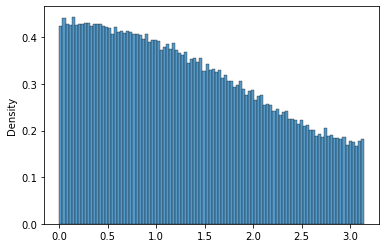

In [30]:
sns.histplot(data=alphas_folded, bins=100, stat='density')

Effects ot different bandwidths when doing kernel density estimations with a mixture of gaussians

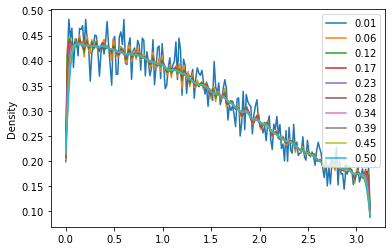

In [31]:
fig, ax = plt.subplots()
for bw in np.linspace(0.01,0.5,10):
  sns.kdeplot(data=alphas_folded, cut=0, clip=[0.0,np.pi], bw_adjust=bw, label=f"{bw:.2f}", ax=ax)
plt.legend(loc='upper right')

## Fit the probability distribution based on Fourier expansion

We use this as our model for the probability distribution of $\alpha$ with unknown coefficients $\tilde{\rho}_k$:

$$\rho(\alpha)=\frac{1}{2 \pi}+\sum_{k=1}^{\infty} \tilde{\rho}_{k} \cos (k \alpha)$$

Choose the number of parameters and their names based on how many Fourier coefficients to keep:

In [32]:
Nf = 3  # number of Fourier coefficient
parameters = [f"k{i+1}" for i in np.arange(Nf)]

def prior_transform(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales
    params = cube.copy()
    # all parameters should around 0: change the limits if needed
    lo = -0.1
    hi = 0.1
    params[:] = cube[:] * (hi - lo) + lo
    return params

In [33]:
parameters

['k1', 'k2', 'k3']

Define the model above

In [34]:
alpha = np.random.rand(10)
params = np.random.rand(Nf)
fourier_terms = np.array([params[k]*np.cos((k+1)*alpha) for k in np.arange(Nf)])

In [35]:
fourier_terms.shape

(3, 10)

In [36]:
prob = fourier_terms.sum(axis=0)+1./(2.*np.pi)

In [37]:
if (prob < 0).any():
  print("Some are negative")

Some are negative


Make sure to only keep positive probabilities

In [38]:
def prob_model(alpha,params):
  fourier_terms = np.array([params[k]*np.cos((k+1)*alpha) for k in np.arange(Nf)])
  prob = 1./(2.*np.pi) + fourier_terms.sum(axis=0)  # the k=0 term is 1/2pi
  if (prob < 0).any():  # if some probs are negative, the total prob is 0
    return np.zeros_like(prob)
  return prob

In [39]:
prob_model(np.random.rand(1),np.random.rand(Nf))

array([1.80492969])

In [40]:
prob_model(np.random.rand(2),np.random.rand(Nf))

array([1.28244711, 0.65708316])

This likelihood ignores the correlations between differen $\alpha$ values. We define it as:

$$ \mathcal{L} \propto \prod_{n=1}^{n_{\text {config }}} \prod_{i=1}^{N} \rho\left(\alpha_{i}^{(n)}\right) $$

In [41]:
def log_likelihood(params):
    # compute the probability for each alpha point
    probs_alphas = prob_model(alphas,params)
    assert probs_alphas.shape[0] == alphas.shape[0]
    # the total probability is the product of the individual ones, we assume independent
    # for numerical stability, we work in log and avoid zeros
    loglike = np.log(probs_alphas + 1e-100).sum()
    return loglike

The log-likelihood is often ridiculously small (and negative) because the probabilities are zero hence the sum of logs is -$\infty$

In [42]:
log_likelihood(np.random.rand(Nf))

-36399265.15004988

If all parameters are set to zero, the probabilities do not depend on the data and are always equal to $1/2\pi$. This gives the following log-likelihood

In [45]:
loglikezero = log_likelihood(np.zeros(Nf))
print(loglikezero)

-290531.60665798926


We can check if that is correct

In [46]:
# number of alphas
n_data = alphas.shape[0]
loglik = np.log([1/(2*np.pi)]*n_data).sum()
print(loglik)

-290531.60665798926


In [47]:
assert(np.isclose(loglik,loglikezero))

### Run the sampler

Define the reactive nested sampler

In [48]:
import ultranest

sampler = ultranest.ReactiveNestedSampler(parameters, log_likelihood, prior_transform)


If needed you can add a slice sampler for a more efficient sampling in high dimensions

In [ ]:
# import ultranest.stepsampler

# # have to choose the number of steps the slice sampler should take
# # after first results, this should be increased and checked for consistency.

# nsteps = 2 * len(parameters)
# # create step sampler:
# sampler.stepsampler = ultranest.stepsampler.RegionSliceSampler(nsteps=nsteps)

In [49]:
results = sampler.run(min_num_live_points=400)

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+05  ..-283948.73 [-283948.7750..-283948.7749]*| it/evals=6640/11721 eff=58.1927% N=348 
[ultranest] Likelihood function evaluations: 11721
[ultranest]   logZ = -2.84e+05 +- 0.15
[ultranest] Effective samples strategy satisfied (ESS = 1634.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.04 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.19 bs:0.15 tail:0.01 total:0.15 required:<0.50
[ultranest] done iterating.


### Plot results

In [50]:
sampler.print_results()


logZ = -283963.220 +- 0.263
  single instance: logZ = -283963.220 +- 0.180
  bootstrapped   : logZ = -283963.208 +- 0.263
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    k1                  : 0.06057│ ▁   ▁▁▁▁▁▁▂▂▃▃▅▅▅▇▇▇▆▇▆▇▅▃▃▂▁▁▁▁▁▁▁ ▁ │0.06534    0.06308 +- 0.00055
    k2                  : -0.00949│ ▁ ▁▁▁▁▁▁▁▁▁▂▃▃▄▄▄▆▆▇▇▇▆▅▄▄▄▂▂▁▁▁▁▁ ▁▁ │-0.00490    -0.00699 +- 0.00056
    k3                  : -0.00082│ ▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▇▇▇▇▇▇▆▆▅▃▂▂▂▁▁▁▁▁▁▁ ▁ │0.00354    0.00131 +- 0.00054



The result includes an estimate of the evidence `logZ` (or marginal likelihood) which tells us how probable the data is under this model. This is the strength of nested sampling methods. It allows us to discriminate between models. For example, we can run the code again with the same data but a different number of Fourier coefficients. The difference in `logZ` will tell us which model is favored by the data! (e.g. see [this tutotial](https://johannesbuchner.github.io/UltraNest/example-sine-modelcomparison.html))

Table of results for `logZ`:

 Model  | Evidence |
| ----- | ----------- |
| Nf = 5  |  logZ = -70674.178 +- 0.413 |
| Nf = 4  |  logZ = -70670.095 +- 0.315 |
| Nf = 3  |  logZ = -70667.004 +- 0.259 |
| Nf = 2  |  logZ = -70672.906 +- 0.273 |
| Nf = 1  |  logZ = -70781.606 +- 0.116 |

In [51]:
# result_nf5 = sampler
# result_nf4 = sampler
result_nf3 = sampler
# result_nf2 = sampler
# result_nf1 = sampler

In [117]:
logBF = result_nf3.results['logz'] - result_nf2.results['logz']
K = np.exp(logBF)
print(f"logBF = {logBF:.3f}")
print(f"K = {K:.3f}")
print(f"The first model is {K:.3f} times more probable than the second model")
print("assuming the models are equally probable a priori.")

logBF = 5.903
K = 365.992
The first model is 365.992 times more probable than the second model
assuming the models are equally probable a priori.


In [ ]:
sampler.results

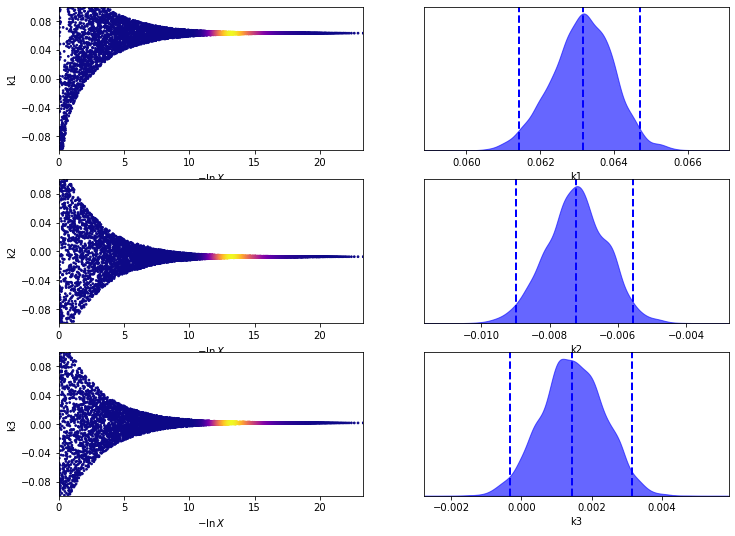

In [124]:
sampler.plot_trace()

In [125]:
from corner import corner
import arviz as az 
import xarray as xr 

df = pd.DataFrame(sampler.results['samples'], columns=parameters)
df["chain"] = 0
df["draw"] = np.arange(len(df), dtype=int)
df = df.set_index(["chain", "draw"])
xdata = xr.Dataset.from_dataframe(df)

dataset = az.InferenceData(posterior=xdata)

In [127]:
dataset

Inference data with groups:
	> posterior

array([<AxesSubplot:title={'center':'k1'}>,
       <AxesSubplot:title={'center':'k2'}>,
       <AxesSubplot:title={'center':'k3'}>], dtype=object)

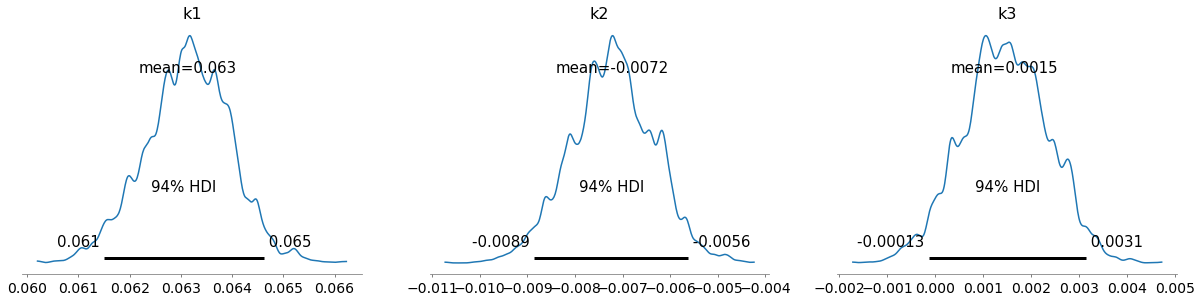

In [126]:
az.plot_posterior(dataset) # or choose only one parameter with var_names=['k1']

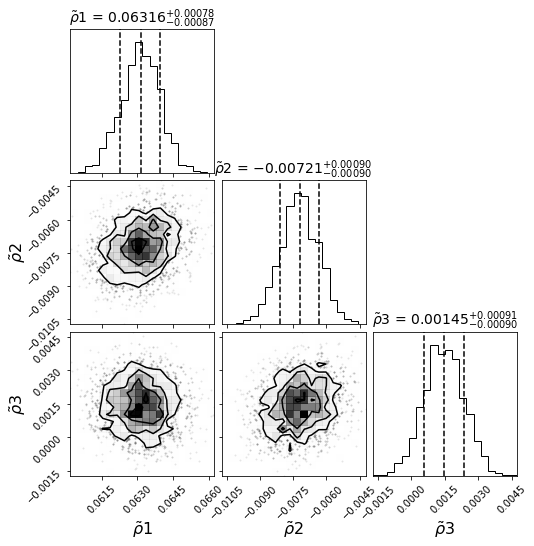

In [128]:
labels = [r"$\tilde{\rho}$" + f"{k+1}" for k in range(Nf)]
fig = corner(
    data=dataset,
    labels=labels,
    show_titles=True,
    title_fmt=".5f",
    quantiles=[0.16, 0.5, 0.84],
    title_kwargs={"fontsize": 14},
    label_kwargs={"fontsize": 16},
)


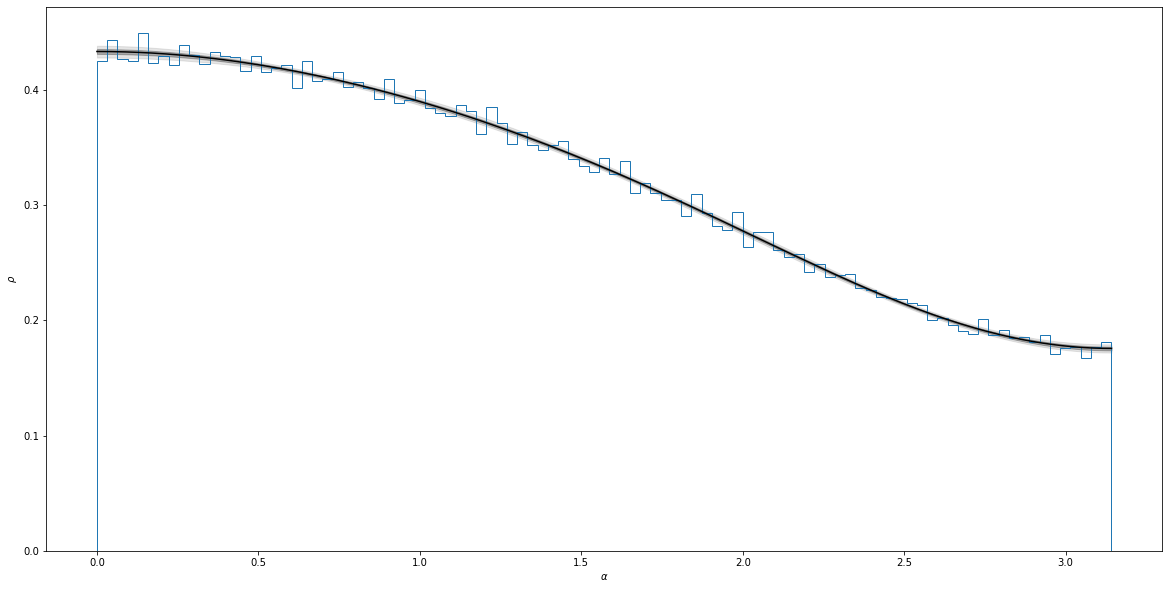

In [56]:
from ultranest.plot import PredictionBand
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\rho$')
bins = np.linspace(0, np.pi, 100)
plt.hist(alphas_folded,bins,density=True,histtype='step');

alpha_grid = np.linspace(0, np.pi, 500)
band = PredictionBand(alpha_grid)

# go through the solutions
for params in sampler.results['samples']:
    # compute for each time the probability from the model
    band.add(2*prob_model(alpha_grid,params))

# add central values
band.line(color='k')
# add 1 sigma quantile
band.shade(color='k', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='gray', alpha=0.2)


## Extract the value of $\rho$ at $\pi$

Take all the samples at the value of $\pi$ (remember that we saved 2$\rho$ in the prediction band)

In [57]:
rhopi = np.asarray([rho[-1]/2 for rho in band.ys])

<AxesSubplot:ylabel='Density'>

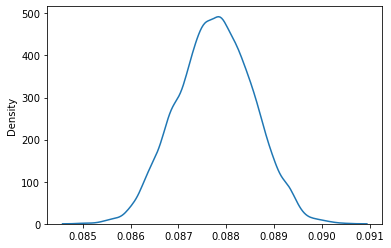

In [58]:
sns.kdeplot(data=rhopi)

In [59]:
print(f"Value of rho(pi) = {rhopi.mean():.5f} +- {rhopi.std():.5f}")

Value of rho(pi) = 0.08777 +- 0.00079


In [60]:
errs = np.diff(np.quantile(rhopi,[0.16,0.5,0.84]))
print(f"Value of rho(pi) = {rhopi.mean():.5f} + {errs[1]:.5f} - {errs[0]:.5f}")

Value of rho(pi) = 0.08777 + 0.00077 - 0.00084


Pretty formatting

In [61]:
from IPython.display import display, Math

mcmc = np.percentile(rhopi, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
txt = txt.format(mcmc[1], q[0], q[1], '\\rho(\pi)')
display(Math(txt))

<IPython.core.display.Math object>

Value of $M$: derived from the equation 
$$
\rho(\pi) = \frac{1}{2\pi} \left( 1 - \frac{M}{N} \right)
$$

In [62]:
M = N * (1. - 2 * np.pi * rhopi)
errs = np.diff(np.quantile(M,[0.16,0.5,0.84]))
print(f"Value of M = {M.mean():.5f} + {errs[1]:.5f} - {errs[0]:.5f}")

Value of M = 28.70660 + 0.33931 - 0.31103


In [63]:
mcmc = np.percentile(M, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
txt = txt.format(mcmc[1], q[0], q[1], 'M')
display(Math(txt))

<IPython.core.display.Math object>

In [64]:
M = N * (1.0 - 2 * np.pi * rhopi)
mcmc = np.percentile(M, [16, 50, 84])
errs = np.diff(mcmc)
print(f"Value of M = {mcmc[1]:.5f} + {errs[1]:.5f} - {errs[0]:.5f}")

Value of M = 28.70041 + 0.33931 - 0.31103


In [75]:
M_df = pd.DataFrame(
    data={
        "M": mcmc[1],
        "plusM": errs[1],
        "minusM": errs[0],
        "NF": Nf,
        "logZ": sampler.results["logz"],
        "logZerr": sampler.results["logzerr"],
    },
    index=[0]
)

In [76]:
M_df

,M,plusM,minusM,NF,logZ,logZerr
0,28.700407,0.339313,0.311034,3,-283963.219768,0.263334


# Comparison of models

We have saved on disk the results for M from fits with different number of Fourier coefficients

In [29]:
N = 16
NT = 32
T = 0.29
P = 0.2
data_folder = f"./m-values/N{N}/S{NT}/M{N}/T{str(T).replace('.','')}/P{str(P).replace('.','')}"

In [30]:
df_2 = pd.read_csv(os.path.join(data_folder,"NF2/results.csv"), header=0,index_col=0)
df_3 = pd.read_csv(os.path.join(data_folder,"NF3/results.csv"), header=0,index_col=0)
df_4 = pd.read_csv(os.path.join(data_folder,"NF4/results.csv"), header=0,index_col=0)
df_5 = pd.read_csv(os.path.join(data_folder,"NF5/results.csv"), header=0,index_col=0)


In [31]:
df = pd.concat([df_2,df_3,df_4,df_5], axis=0)

In [32]:
df

,M,plusM,minusM,NF,logZ,logZerr
0,7.370442,0.099048,0.098239,2,-142240.425157,0.308141
0,7.556748,0.108402,0.116348,3,-142240.537104,0.313074
0,7.613022,0.123531,0.121749,4,-142244.595494,0.316907
0,7.608969,0.149478,0.135108,5,-142249.302741,0.444747


Text(0, 0.5, '$M$')

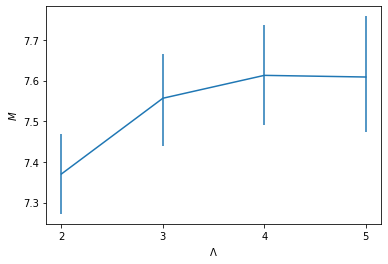

In [33]:
plt.errorbar(df.NF,df.M,[df.minusM,df.plusM])
plt.xticks([2,3,4,5])
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"$M$")

In [34]:
logBF2 = df.iloc[0].logZ - df.logZ
logBF3 = df.iloc[1].logZ - df.logZ
logBF4 = df.iloc[2].logZ - df.logZ
logBF5 = df.iloc[3].logZ - df.logZ

In [35]:
K2 = np.exp(logBF2)
K3 = np.exp(logBF3)
K4 = np.exp(logBF4)
K5 = np.exp(logBF5)

In [36]:
K = [K2,K3,K4,K5]

In [37]:
for i in [2,3,4,5]:
    print(f"The model with {i} coefficients is {K[i-2].values} times more probable")

The model with 2 coefficients is [1.00000000e+00 1.11845311e+00 6.47372905e+01 7.16944534e+03] times more probable
The model with 3 coefficients is [8.94092022e-01 1.00000000e+00 5.78810950e+01 6.41014388e+03] times more probable
The model with 4 coefficients is [1.54470475e-02 1.72767982e-02 1.00000000e+00 1.10746763e+02] times more probable
The model with 5 coefficients is [1.39480804e-04 1.56002739e-04 9.02960933e-03 1.00000000e+00] times more probable


In [38]:
df.iloc[df.logZ.argmax()].NF

2.0

In [22]:
df16 = df.copy()

In [28]:
df24 = df.copy()

In [39]:
df32 = df.copy()

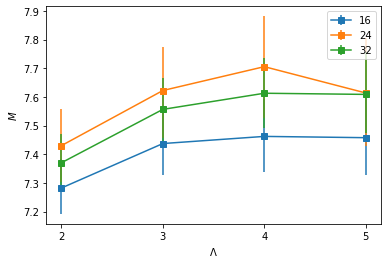

In [41]:
for df in [df16, df24, df32]:
    plt.errorbar(df.NF,df.M,[df.minusM,df.plusM],marker='s')
plt.xticks([2,3,4,5])
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"$M$")
plt.legend(labels=[16,24,32])

## Collection of results

In [3]:
def mvalue(N,NT,T,P):
    data_folder = f"./m-values/N{N}/S{NT}/M{N}/T{str(T).replace('.','')}/P{str(P).replace('.','')}"
    try:
        df_2 = pd.read_csv(os.path.join(data_folder,"NF2/results.csv"), header=0,index_col=0)
        df_3 = pd.read_csv(os.path.join(data_folder,"NF3/results.csv"), header=0,index_col=0)
        df_4 = pd.read_csv(os.path.join(data_folder,"NF4/results.csv"), header=0,index_col=0)
        df_5 = pd.read_csv(os.path.join(data_folder,"NF5/results.csv"), header=0,index_col=0)
    except FileNotFoundError:
        return None
    return pd.concat([df_2,df_3,df_4,df_5], axis=0)

In [48]:
df16 = mvalue(24,16,0.29,0.2)
df24 = mvalue(24,24,0.29,0.2)
df32 = mvalue(24,32,0.29,0.2)

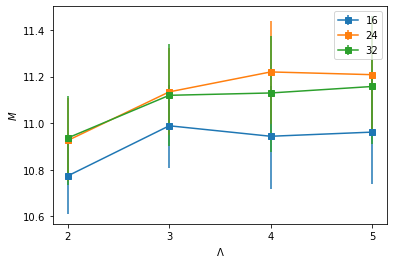

In [49]:
for df in [df16, df24, df32]:
    plt.errorbar(df.NF,df.M,[df.minusM,df.plusM],marker='s')
plt.xticks([2,3,4,5])
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"$M$")
plt.legend(labels=[16,24,32])

### Best evidence

In [74]:
for df in [df16, df24, df32]:
    print(df.iloc[df.logZ.argmax()].NF)

2.0
2.0
2.0


### AIC

In [58]:
import json

In [68]:
with open(os.path.join(data_folder,"NF2/sample_rho/info","results.json"),'r') as f:
    abc = json.load(f)

In [69]:
ml = abc['maximum_likelihood']

In [70]:
ml2 = ml.copy()

In [72]:
AIC2 = -2 * ml2['logl'] + 2

In [73]:
print(AIC3)
print(AIC2)

284456.2097267812
284464.142147849


## Make table 1 in the paper

In [8]:
for p in [0.2, 0.25]:
    j = 0
    for n in [16, 24, 32, 64]:
        for i, nt in enumerate([16, 24, 32]):
            df = mvalue(n, nt, 0.29, p)
            try:
                ms = df.query("NF==3")[["M", "plusM", "minusM"]].values[0]
                if i == 0 and j == 0:
                    print(
                        f"{p} & {n} & {nt} & ${ms[0]:.2f}^{{+{ms[1]:.2f}}}_{{-{ms[2]:.2f}}}$"
                    )
                elif i == 0 and j > 0:
                    print(
                        f"    & {n} & {nt} & ${ms[0]:.2f}^{{+{ms[1]:.2f}}}_{{-{ms[2]:.2f}}}$"
                    )
                else:
                    print(
                        f"    &     & {nt} & ${ms[0]:.2f}^{{+{ms[1]:.2f}}}_{{-{ms[2]:.2f}}}$"
                    )
            except AttributeError:
                pass
        j += 1
    j = 0
    for n in [96]:
        for i, nt in enumerate([16, 24]):
            df = mvalue(n, nt, 0.29, p)
            try:
                ms = df.query("NF==3")[["M", "plusM", "minusM"]].values[0]
                if i == 0 and j == 0:
                    print(
                        f"{p} & {n} & {nt} & ${ms[0]:.2f}^{{+{ms[1]:.2f}}}_{{-{ms[2]:.2f}}}$"
                    )
                elif i == 0 and j > 0:
                    print(
                        f"    & {n} & {nt} & ${ms[0]:.2f}^{{+{ms[1]:.2f}}}_{{-{ms[2]:.2f}}}$"
                    )
                else:
                    print(
                        f"    &     & {nt} & ${ms[0]:.2f}^{{+{ms[1]:.2f}}}_{{-{ms[2]:.2f}}}$"
                    )
            except AttributeError:
                pass
        j += 1


0.2 & 16 & 16 & $7.44^{+0.12}_{-0.11}$
    &     & 24 & $7.62^{+0.15}_{-0.16}$
    &     & 32 & $7.56^{+0.11}_{-0.12}$
    & 24 & 16 & $10.99^{+0.18}_{-0.18}$
    &     & 24 & $11.13^{+0.19}_{-0.19}$
    &     & 32 & $11.12^{+0.22}_{-0.22}$
    & 32 & 16 & $14.51^{+0.21}_{-0.19}$
    &     & 24 & $14.77^{+0.22}_{-0.22}$
    &     & 32 & $14.91^{+0.21}_{-0.23}$
    & 64 & 16 & $28.70^{+0.31}_{-0.31}$
    &     & 24 & $29.04^{+0.31}_{-0.34}$
    &     & 32 & $29.06^{+0.29}_{-0.29}$
0.25 & 16 & 16 & $10.06^{+0.09}_{-0.10}$
    &     & 24 & $9.99^{+0.13}_{-0.13}$
    &     & 32 & $10.18^{+0.14}_{-0.15}$
    & 24 & 16 & $14.85^{+0.17}_{-0.16}$
    &     & 24 & $14.92^{+0.17}_{-0.17}$
    &     & 32 & $15.18^{+0.11}_{-0.12}$
    & 32 & 16 & $19.52^{+0.18}_{-0.15}$
    &     & 24 & $19.81^{+0.22}_{-0.23}$
    &     & 32 & $19.92^{+0.19}_{-0.18}$
    & 64 & 16 & $38.19^{+0.30}_{-0.28}$
    &     & 24 & $38.77^{+0.37}_{-0.36}$
    &     & 32 & $39.11^{+0.33}_{-0.34}$
